# Pyspark

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, year, month, avg


In [ ]:
# Initialize SparkSession
spark = SparkSession.builder.appName("WeatherDataProcessing").getOrCreate()

# Load historical weather data (replace with your data source)
data = spark.read.csv("/content/historical_weather.csv", header=True)
cleaned_data= data.drop('region')
cleaned_data.na.drop()
cleaned_data.show()

+--------------------+-----------+---------+-----+--------------+--------------------+--------------------+-------+--------------------+--------------------+------------------+------------------+----------+----------+-----------+-------+--------+------+-----+----------------+---------------+------+---------+-----------+---------+----------------+---------+---------+-----------+-----------+-------+------+----------------+--------------+------------+----------------+---+-----------+--------+
|                  id|avghumidity|avgtemp_c|cloud|condition_code|      condition_icon|      condition_text|country|daily_chance_of_rain|daily_chance_of_snow|daily_will_it_rain|daily_will_it_snow|      date|date_epoch|feelslike_c|hour_uv|humidity|is_day|  lat|       localtime|localtime_epoch|   lon|maxtemp_c|maxwind_kph|mintemp_c|            name|precip_in|precip_mm|pressure_in|pressure_mb|snow_cm|temp_c|            time|totalprecip_mm|totalsnow_cm|           tz_id| uv|wind_degree|wind_kph|
+---------

In [ ]:
# Transform the data base on dataset
spark.stop()

NameError: name 'cleaned_data' is not defined

In [ ]:
from datetime import datetime, timedelta
def check_up():
    end_date = datetime.now()
    start_date = end_date - timedelta(days=1)

    # Format dates as strings if required by live_weather
    formatted_start_date = end_date.strftime('%Y-%m-%d')
    formatted_end_date = end_date.strftime('%Y-%m-%d')

    print(formatted_start_date)
    print(formatted_end_date)

In [ ]:
check_up()

2024-07-21
2024-07-21


# Explore data

In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv("C:/Users/Dell/historical_weather.csv", index_col='date')

In [3]:
weather

,id,avghumidity,avgtemp_c,cloud,condition_code,condition_icon,condition_text,country,daily_chance_of_rain,daily_chance_of_snow,...,region,snow_cm,temp_c,time,totalprecip_mm,totalsnow_cm,tz_id,uv,wind_degree,wind_kph
date,,,,,,,,,,,,,,,,,,,,,
2024-03-25,4286cd67-728a-420a-bf1b-0d625371c939,81,25.5,82,1006,//cdn.weatherapi.com/weather/64x64/night/119.png,Cloudy,Vietnam,100,0,...,NaN,0,24.2,2024-03-25 00:00,0.27,0,Asia/Bangkok,6,141,16.6
2020-09-06,952c3aa0-16b7-4376-a1c5-a0d1655ffc83,72,29.3,60,1006,//cdn.weatherapi.com/weather/64x64/night/119.png,Cloudy,Vietnam,100,0,...,NaN,0,27.3,2020-09-06 02:00,1.50,0,Asia/Ho_Chi_Minh,7,230,8.0
2024-02-21,b09685e8-cf55-4b79-9293-96a685c724a4,67,28.6,7,1000,//cdn.weatherapi.com/weather/64x64/night/113.png,Clear,Vietnam,45,0,...,NaN,0,25.9,2024-02-21 20:00,0.00,0,Asia/Ho_Chi_Minh,9,140,19.1
2018-12-23,635a56a1-1c8a-463e-beb6-151f42db2390,78,22.3,64,1063,//cdn.weatherapi.com/weather/64x64/night/176.png,Patchy rain possible,Vietnam,100,0,...,NaN,0,22.0,2018-12-23 02:00,3.28,0,Asia/Bangkok,5,104,8.5
2024-03-04,7787fe5b-5688-48b8-9e20-86fd7d50d371,84,24.0,9,1000,//cdn.weatherapi.com/weather/64x64/day/113.png,Sunny,Vietnam,0,0,...,NaN,0,27.1,2024-03-04 15:00,0.00,0,Asia/Ho_Chi_Minh,7,121,23.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-07,7e3219b3-eb35-4749-94a8-3cacc5f44ac1,85,26.8,58,1063,//cdn.weatherapi.com/weather/64x64/day/176.png,Patchy rain possible,Vietnam,100,0,...,NaN,0,26.4,2012-09-07 07:00,4.10,0,Asia/Ho_Chi_Minh,6,212,7.6
2014-09-30,d04e1907-e8d5-4f4d-8e8b-ce00ade2c690,84,26.6,28,1003,//cdn.weatherapi.com/weather/64x64/night/116.png,Partly cloudy,Vietnam,100,0,...,NaN,0,26.2,2014-09-30 18:00,0.20,0,Asia/Ho_Chi_Minh,8,89,6.8
2012-08-18,cdc6b6ab-bf6b-4e31-ad51-8e87fee6d374,87,28.3,26,1003,//cdn.weatherapi.com/weather/64x64/day/116.png,Partly cloudy,Vietnam,100,0,...,NaN,0,28.2,2012-08-18 18:00,0.50,0,Asia/Ho_Chi_Minh,7,114,5.8


In [3]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

id                      0.0
avghumidity             0.0
avgtemp_c               0.0
cloud                   0.0
condition_code          0.0
condition_icon          0.0
condition_text          0.0
country                 0.0
daily_chance_of_rain    0.0
daily_chance_of_snow    0.0
daily_will_it_rain      0.0
daily_will_it_snow      0.0
date_epoch              0.0
feelslike_c             0.0
hour_uv                 0.0
humidity                0.0
is_day                  0.0
lat                     0.0
localtime               0.0
localtime_epoch         0.0
lon                     0.0
maxtemp_c               0.0
maxwind_kph             0.0
mintemp_c               0.0
name                    0.0
precip_in               0.0
precip_mm               0.0
pressure_in             0.0
pressure_mb             0.0
region                  1.0
snow_cm                 0.0
temp_c                  0.0
time                    0.0
totalprecip_mm          0.0
totalsnow_cm            0.0
tz_id               

In [4]:
valid_columns = weather.columns[null_pct < .05]

In [5]:
valid_columns

Index(['id', 'avghumidity', 'avgtemp_c', 'cloud', 'condition_code',
       'condition_icon', 'condition_text', 'country', 'daily_chance_of_rain',
       'daily_chance_of_snow', 'daily_will_it_rain', 'daily_will_it_snow',
       'date_epoch', 'feelslike_c', 'hour_uv', 'humidity', 'is_day', 'lat',
       'localtime', 'localtime_epoch', 'lon', 'maxtemp_c', 'maxwind_kph',
       'mintemp_c', 'name', 'precip_in', 'precip_mm', 'pressure_in',
       'pressure_mb', 'snow_cm', 'temp_c', 'time', 'totalprecip_mm',
       'totalsnow_cm', 'tz_id', 'uv', 'wind_degree', 'wind_kph'],
      dtype='object')

In [6]:
weather = weather[valid_columns].copy()

In [7]:
weather.columns = weather.columns.str.lower()

In [8]:
weather

,id,avghumidity,avgtemp_c,cloud,condition_code,condition_icon,condition_text,country,daily_chance_of_rain,daily_chance_of_snow,...,pressure_mb,snow_cm,temp_c,time,totalprecip_mm,totalsnow_cm,tz_id,uv,wind_degree,wind_kph
date,,,,,,,,,,,,,,,,,,,,,
2024-03-25,4286cd67-728a-420a-bf1b-0d625371c939,81,25.5,82,1006,//cdn.weatherapi.com/weather/64x64/night/119.png,Cloudy,Vietnam,100,0,...,1010,0,24.2,2024-03-25 00:00,0.27,0,Asia/Bangkok,6,141,16.6
2020-09-06,952c3aa0-16b7-4376-a1c5-a0d1655ffc83,72,29.3,60,1006,//cdn.weatherapi.com/weather/64x64/night/119.png,Cloudy,Vietnam,100,0,...,1007,0,27.3,2020-09-06 02:00,1.50,0,Asia/Ho_Chi_Minh,7,230,8.0
2024-02-21,b09685e8-cf55-4b79-9293-96a685c724a4,67,28.6,7,1000,//cdn.weatherapi.com/weather/64x64/night/113.png,Clear,Vietnam,45,0,...,1011,0,25.9,2024-02-21 20:00,0.00,0,Asia/Ho_Chi_Minh,9,140,19.1
2018-12-23,635a56a1-1c8a-463e-beb6-151f42db2390,78,22.3,64,1063,//cdn.weatherapi.com/weather/64x64/night/176.png,Patchy rain possible,Vietnam,100,0,...,1017,0,22.0,2018-12-23 02:00,3.28,0,Asia/Bangkok,5,104,8.5
2024-03-04,7787fe5b-5688-48b8-9e20-86fd7d50d371,84,24.0,9,1000,//cdn.weatherapi.com/weather/64x64/day/113.png,Sunny,Vietnam,0,0,...,1006,0,27.1,2024-03-04 15:00,0.00,0,Asia/Ho_Chi_Minh,7,121,23.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-07,7e3219b3-eb35-4749-94a8-3cacc5f44ac1,85,26.8,58,1063,//cdn.weatherapi.com/weather/64x64/day/176.png,Patchy rain possible,Vietnam,100,0,...,1011,0,26.4,2012-09-07 07:00,4.10,0,Asia/Ho_Chi_Minh,6,212,7.6
2014-09-30,d04e1907-e8d5-4f4d-8e8b-ce00ade2c690,84,26.6,28,1003,//cdn.weatherapi.com/weather/64x64/night/116.png,Partly cloudy,Vietnam,100,0,...,1011,0,26.2,2014-09-30 18:00,0.20,0,Asia/Ho_Chi_Minh,8,89,6.8
2012-08-18,cdc6b6ab-bf6b-4e31-ad51-8e87fee6d374,87,28.3,26,1003,//cdn.weatherapi.com/weather/64x64/day/116.png,Partly cloudy,Vietnam,100,0,...,1006,0,28.2,2012-08-18 18:00,0.50,0,Asia/Ho_Chi_Minh,7,114,5.8


In [9]:
weather = weather.ffill()

In [11]:
weather.apply (pd.isnull).sum()

id                      0
avghumidity             0
avgtemp_c               0
cloud                   0
condition_code          0
condition_icon          0
condition_text          0
country                 0
daily_chance_of_rain    0
daily_chance_of_snow    0
daily_will_it_rain      0
daily_will_it_snow      0
date_epoch              0
feelslike_c             0
hour_uv                 0
humidity                0
is_day                  0
lat                     0
localtime               0
localtime_epoch         0
lon                     0
maxtemp_c               0
maxwind_kph             0
mintemp_c               0
name                    0
precip_in               0
precip_mm               0
pressure_in             0
pressure_mb             0
snow_cm                 0
temp_c                  0
time                    0
totalprecip_mm          0
totalsnow_cm            0
tz_id                   0
uv                      0
wind_degree             0
wind_kph                0
dtype: int64

weather.apply(lambda x: (x == 9999).sum())

In [12]:
weather.dtypes

id                       object
avghumidity               int64
avgtemp_c               float64
cloud                     int64
condition_code            int64
condition_icon           object
condition_text           object
country                  object
daily_chance_of_rain      int64
daily_chance_of_snow      int64
daily_will_it_rain        int64
daily_will_it_snow        int64
date_epoch                int64
feelslike_c             float64
hour_uv                   int64
humidity                  int64
is_day                    int64
lat                     float64
localtime                object
localtime_epoch           int64
lon                     float64
maxtemp_c               float64
maxwind_kph             float64
mintemp_c               float64
name                     object
precip_in               float64
precip_mm               float64
pressure_in             float64
pressure_mb               int64
snow_cm                   int64
temp_c                  float64
time    

In [13]:
weather.index

Index(['2024-03-25', '2020-09-06', '2024-02-21', '2018-12-23', '2024-03-04',
       '2022-08-08', '2013-06-08', '2022-10-02', '2012-06-26', '2014-09-14',
       ...
       '2012-07-13', '2022-01-18', '2012-11-03', '2020-03-08', '2014-03-01',
       '2012-09-07', '2014-09-30', '2012-08-18', '2024-01-04', '2016-09-15'],
      dtype='object', name='date', length=213960)

In [14]:
weather.index = pd.to_datetime(weather.index)

In [15]:
weather.index.year.value_counts().sort_index()

date
2010    18360
2011     8760
2012    26352
2013     8760
2014    26256
2015     4080
2016    26352
2018    26280
2020    26352
2022    26280
2024    16128
Name: count, dtype: int64

In [16]:
# drop row which not in even year
weather = weather[weather.index.year % 2 == 0]

In [17]:
weather.index.year.value_counts().sort_index()

date
2010    18360
2012    26352
2014    26256
2016    26352
2018    26280
2020    26352
2022    26280
2024    16128
Name: count, dtype: int64

<Axes: xlabel='date'>

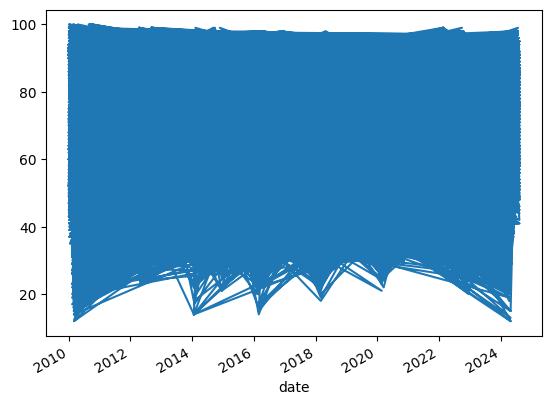

In [18]:
weather["humidity"].plot()